In [10]:
from IPython.display import Image

# Second Progress Report
## Stochastic Gradient Descent Hamiltonian Monte Carlo
Gilad Amitai and Beau Coker

All code is available here: https://github.com/gldmt-duke/CokerAmitaiSGHMC

### Abstract

Hamiltonian Monte Carlo is an MCMC algorithm that lets us more efficiently sample a target distribution, using notions of a Hamiltonian system. Computation can be taxing since in order to do the time evolution, the gradient of the potential energy must be computed at each step. The Stochastic Gradient Hamiltonian Monte Carlo uses a subset of the data to compute the gradient, thus cutting down on computation, but producing a noisier estimate.


### Background

##### Algorithm

**Input:** Starting position $\theta^{(1)}$ and step size $\epsilon$

**for $t=1,2,\dotsc$ do:**

 Resample momentum $r$

 $\quad r^{(t)}\sim \mathcal{N}(0,M)$

 $\quad (\theta_0,r_0) = (\theta^{(t)}, r^{(t)})$

 Simulate Hamiltonian dynamics:

 **for $i=1$ to $m$ do:**

 $\quad \theta_i \leftarrow \theta_{i-1} + \epsilon_t M^{-1} r_{i-1}$

 $\quad r_i \leftarrow r_{i-1} + \epsilon_t \nabla \tilde{U}(\theta_i) - \epsilon_t C M^{-1} r_{i-1} + \mathcal{N}(0, 2(C-\hat{B})\epsilon_t)$

 **end**

 $\quad (\theta^{(t+1)}, r^{(t+1)}) = (\theta_m,r_m)$

--------------------

Where:

 - $\theta$ is the set of parameters for which we want to sample from the posterior distribution.
 - $r$ is the momentum term.
 - $U(\theta)$ is the potential energy function, equal to the negative log posterior.
 - $\nabla \tilde{U}$ is the stochastic gradient to the potential energy.
 - $m$ is the number of simulation steps.
 - We can think of $M$ as a mass matrix. Together with the momentum $r$, the term $\frac{1}{2} r^\intercal M^{-1} r$ represents kinetic energy.
 - $B(\theta)=\frac{1}{2}\epsilon V(\theta)$ is the diffusion matrix contributed by gradient noise. In practice, we assume inaccurate estimation $\hat{B}$ of $B$.
 - $C$ is a user specified friction term such that $C\succeq \hat{B}$


### Optimization


### Applications to simulated data sets

To understand Stochastic Gradient descent Hamiltonian Monte Carlo (SGHMC), we illustrate two modifications of Hamiltonian Monte Carlo (HMC):

 - __MH vs. no MH__: The Hamiltonian dynamics give the time evolution of the system from which we want to sample. In practice, since we cannot simulate exactly the time evolution of a continous system, we discretize the system and use the "leapfrog" method. The use of this method requires a Metropolis Hastings step as a correction. We implement HMC algorithms with and without this correction step.
 - __Gradient vs. stochastic gradient__: To implement the leapfrog method, we need to evaluate the gradient of the potential energy function $U(\theta)$. The purpose of this paper is to explore replacing this gradient $\nabla U(\theta)$ with a stochastic gradient $\nabla \tilde{U}$. We implement HMC algorithms with regular gradients and stochastic gradients. 
 
For each of the four permutations of these two modifications, we show the performance of the algorithm on simulated data from a simple target distribution $U(\theta) = -2\theta^2 + \theta^4$. The gradient $\nabla U$ is calculated analytically, and we obtain a stochastic gradient $\nabla \tilde{U} = \nabla{U} + \mathcal{N}(0,4)$ by adding normally distributed noise.

We also show the performance of SGHMC, which does not include a Metropolis Hastings step, does include a stochastic gradient, and, importantly, includes a friction term that counteracts the effects of the noisy gradient.

As can be seen in the figure below, each algorithm successfully converges to the target distribution except the the HMC with the stochastic gradient and no Metropolis Hastings step. The introduction of the friction term is what separates this algorithm from SGHMC.



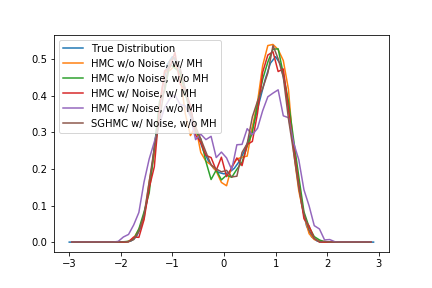

In [13]:
Image("../fig1.png")

Next, for another simple system $U(\theta)=\frac{1}{2}\theta^2$, we show the samples of the momentum term $r$ and the parameter of interest $\theta$. In the figure, lighter colors indicate samples later in the simulation. The Hamiltonian samples, where energy is conserved, are near the orgin. Samples using the noisy hamiltonian spiral away from the origin. Adding the friction term keeps the posterior samples in a reasonable range.

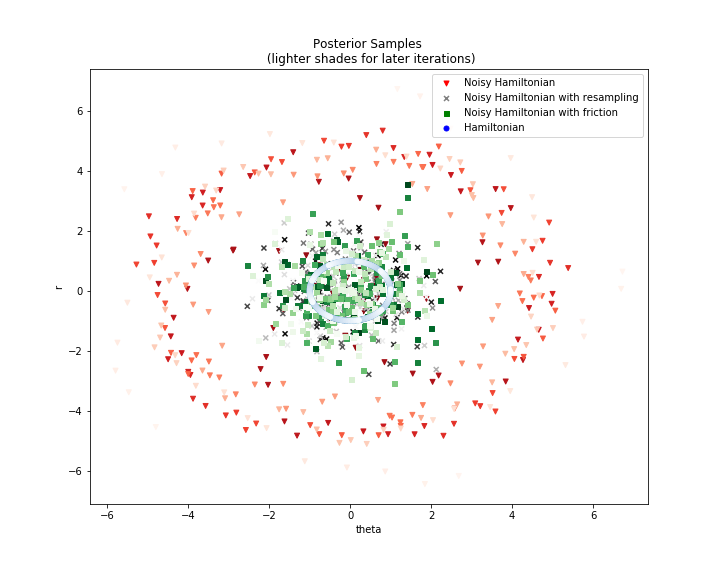

In [12]:
Image("../fig2.png")


### Applications to real data sets


### Comparative analysis with competing algorithms


### Discussion


### References/bibliography


